# Exercises: Introduction to Futures Contracts - Answer Key
By Christopher van Hoecke, Maxwell Margenot, and Delaney Mackenzie

## Lecture Link : 
https://www.quantopian.com/lectures/introduction-to-futures

### IMPORTANT NOTE: 
This lecture corresponds to the Futures lecture, which is part of the Quantopian lecture series. This homework expects you to rely heavily on the code presented in the corresponding lecture. Please copy and paste regularly from that lecture when starting to work on the problems, as trying to do them from scratch will likely be too difficult.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

----

In [1]:
# Useful Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

----

# Exercise 1: Futures Contract vs. Spot Markets

In 2016, a corn farmer decided to sell his corn at the spot price to a distributor.

Decide whether his decision to sell corn at the spot price was a wise one by comparing his profits from the market contract with his potential profits from the futures contract.

Use the price of CORN, an ETF, as the spot price for 6 bushels of corn when he goes to market.

You may also assume the following:
- The producer plans on selling 15,000 bushels of corn in September 2016
- The farmer would enter into a futures position on June 1st
- The spot price sale would take place on the same date that the futures contract expires
- No fees or payments are included in the futures sale or the market sale

(Note that the listed futures price of corn is for one bushel.)

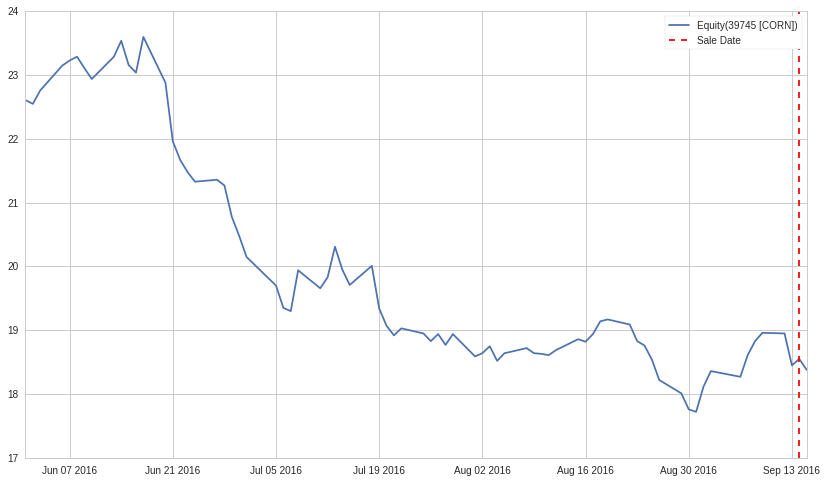

In [2]:
bushels = 15000
spot_symbol = 'CORN'
futures_contract = symbols('CNU16')
spot_prices = get_pricing(spot_symbol, start_date = '2016-06-01', end_date = '2016-09-15', fields = 'price')
futures_prices = get_pricing(futures_contract, start_date = '2016-06-01',end_date='2016-09-15', fields='price')

# Sale date of corn
sale_date = '2016-09-14'

# Plotting
plt.plot(spot_prices);
plt.axvline(sale_date, linestyle='dashed', color='r', label='Sale Date')
plt.legend();

In [3]:
p = spot_prices.loc[sale_date]

market_profits = p * (bushels//6)

print 'profits from market price: $', market_profits

profits from market price: $ 46375.0


In [4]:
futures_entry_date = '2016-06-01'

futures_profits = futures_prices.loc[futures_entry_date] * bushels
print 'profits from future contract: $', futures_profits

profits from future contract: $ 62287.5


We can clearly see that it would have been wiser for the farmer to sell his corn using a futures contract to lock in the price in June. Let's calculate the lost profit:

In [5]:
lost_profits = futures_profits - market_profits
print 'Profits the producer lost in a year: $', int(lost_profits)

Profits the producer lost in a year: $ 15912


----

# Exercise 2: Carrying Costs

## a. Contango

Consider the same corn farmer from Exercise 1. 

Calculate the theoretical futures price series as a function of time, given the following:
- The cost of carry is $0.01$
- The spot price of corn was originally 1000 dollars, and that the price is driven by a normal distribution
- Maturity is achieved after 100 days

$$\text{Recall:}  \quad   F(t, T) = S(t)e^{c(T - t)}$$


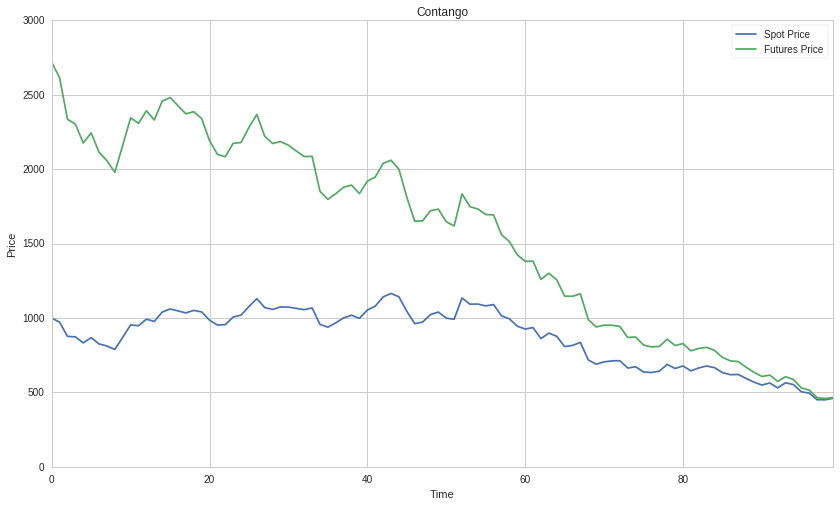

In [6]:
# A toy example to show Contango
N = 100 # Days to expiry of futures contract
cost_of_carry = 0.01

spot_price = pd.Series(np.ones(N), name = "Spot Price")
futures_price = pd.Series(np.ones(N), name = "Futures Price")

spot_price[0] = 1000
futures_price[0] = spot_price[0]*np.exp(cost_of_carry*N)

for n in range(1, N): 
    spot_price[n] = spot_price[n-1]*(1 + np.random.normal(0, 0.05))
    futures_price[n] = spot_price[n]*np.exp(cost_of_carry*(N - n))

spot_price.plot()
futures_price.plot()
plt.legend()

plt.title('Contango')
plt.xlabel('Time')
plt.ylabel('Price');

## b. Backwardation
Consider the corn farmer again.

Calculate the futures price as a function of time, given the following:

- The cost of carry is -0.01
- The spot price of corn was originally \$1000, and that the price is driven by a normal distribution
- Maturity is achieved after 100 days

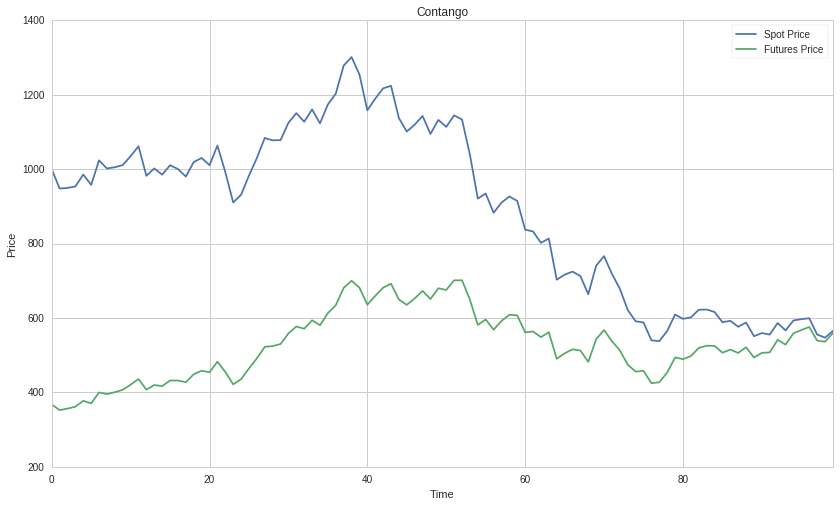

In [7]:
# A toy example to show Contango
N = 100 # Days to expiry of futures contract
cost_of_carry = -0.01

spot_price = pd.Series(np.ones(N), name = "Spot Price")
futures_price = pd.Series(np.ones(N), name = "Futures Price")

spot_price[0] = 1000
futures_price[0] = spot_price[0]*np.exp(cost_of_carry*N)

for n in range(1, N): 
    spot_price[n] = spot_price[n-1]*(1 + np.random.normal(0, 0.05))
    futures_price[n] = spot_price[n]*np.exp(cost_of_carry*(N - n))

spot_price.plot()
futures_price.plot()
plt.legend()

plt.title('Contango')
plt.xlabel('Time')
plt.ylabel('Price');

---

Congratulations on completing the Introduction to Futures exercises!

As you learn more about writing trading models and the Quantopian platform, enter the daily [Quantopian Contest](https://www.quantopian.com/contest). Your strategy will be evaluated for a cash prize every day.

Start by going through the [Writing a Contest Algorithm](https://www.quantopian.com/tutorials/contest) tutorial.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*